# Complex Numbers

Complex numbers are a rare example of more abstract mathematical ideas than can be useful practically. They are useful in a number of different mathematical fields and so have very wide implications on a number of branches of mathematics. However, in the field of computer graphics they have interesting properties which will allow us to describe rotations in a new and somewhat unexpected way. In order to perform rotations, we must understand the basic properties of complex numbers, as taught in the lectures.

In [1]:
## Libraries
import numpy as np
import math 
import matplotlib.pyplot as plt
import sympy as sym
from matplotlib.patches import FancyArrowPatch

## Introduction
As seen in the lectures, complex numbers comprise of a real part and an imaginary part, with the letter "i" indicating which is which. In general a complex number is denoted as

$$
z = A+iB,
$$

where $A$ is the real part, $B$ is the imaginary part and $i=\sqrt{-1}$. 

To represent complex numbers in Python, there are two approaches. Python will interpret a number as complex if we append the second value in a sum with the letter j (j is a more common letter in engineering to represent the square-root of -1; i is used, for example, to represent electric current in physics equations): 

In [2]:
z1 = 1 + 2j
z2 = -2 - 2j

## Basic arithmetic operations

When we add or subtract complex numbers, we must add or subtract the real parts and imaginary components separately:

$$
(A+iB)+(C+iD)=(A+C)+i(B+D).
$$

Python understands this too:

In [3]:
print("z1+z2=",z1+z2)
print("z1-z2=",z1-z2)

z1+z2= (-1+0j)
z1-z2= (3+4j)


When we multiply complex numbers, we create a product of four terms:

$$
\begin{align}
(A+iB)⋅(C+iD)&=A \cdot C+iB\cdot C+A\cdot iD+iB\cdot iD, \\
&=AC+i(BC+AD)+i^2BD=(AC-BD)+i(BC+AD).
\end{align}
$$
The result is also a complex number, with the real part given as the addition of two of the pairs, and the complex part given by adding the remaining two.

The key thing here is knowing how to treat $i$. We need to remember that when two imaginary numbers multiply, we need to take account of $i^2={\sqrt{-1}}^2=-1$. Python also knows that this is the case.

For example:
$$
\begin{align}
(1+2i)⋅(-2-2i)&=1 \cdot -2+2i\cdot -2+1\cdot -2i+2i\cdot -2i. \\
&=-2+i(-4-2)-4i^2=(-2+4)-6i=2-6i
\end{align}
$$

Let's check using Python:

In [4]:
print("z1*z2=",z1*z2)

z1*z2= (2-6j)


If we want to do some more advanced things with complex numbers in Python, we should use the "complex" datatype. This tells Python that we are serious about complex numbers and allows us access to more useful mathematical operations related to complex numbers. One example is the ability to immediately tell us what the conjugate of any given complex number is. 

From the lectures, we learned that the conjugate of a complex number, $\bar{z}$, has an imaginary component of opposite sign:

$$
z=A+iB,\\
\bar{z}=A-iB.
$$


In [5]:
z3 = complex(3.,1.)
print("z3= ",z3)
print("conj(z3)=",z3.conjugate())

z3=  (3+1j)
conj(z3)= (3-1j)


Remember too that any complex number multiplied by it's conjugate must entirely be real (the two imaginary products cancel, while the $i^2$ term becomes real).

In [6]:
print("z3*conj(z3) = ",z3*z3.conjugate())

z3*conj(z3) =  (10+0j)


## Complex number division

The complex conjugate is really useful for dividing complex numbers. We can eliminate the presence of a complex term in the denominator by multiplying it by it's conjugate; to balance this, we also multiply the numerator by the complex conjugate of the denominator.

In the lectures we saw how this worked for a general complex number division:

$$
\frac{a+ib}{c+id}=\frac{(a+ib)(c-id)}{(c+id)(c-id)}=\frac{ac+i(bd)-i(ad)-i^2(bd)}{c^2+i(dc)-i(cd)-i^2(d^2)}=\frac{(ac+bd)+i(bc-ad)}{c^2+d^2}
$$

noting that in this example the conjugate of $z=c-id$ is $\bar{z}=c+id$.

We can confirm this approach by having Python carry out a complex division using the division operator, then carrying out the same calculation using the steps seen in lectures:

In [7]:
print("z2/z3=",z2/z3)
numerator = z2*z3.conjugate()
denominator = z3*z3.conjugate()
print("ans=", numerator, "/", denominator, "=", numerator/denominator)

z2/z3= (-0.7999999999999999-0.4j)
ans= (-8-4j) / (10+0j) = (-0.8-0.4j)


## Visualising complex numbers
One way to visualise complex numbers is to use the Argand diagram. In this diagram we plot the real component of the complex number as the $x$-coordinate, and the imaginary component as the $y$-coordinate.

To show this, we'll define a function called "argand". The argument of this function is a complex number. Our function will return the location of this complex number on the Argand diagram, highlighting the $x$- and $y$-components:

In [8]:
def argand(a):
    """Function to create an argand diagram for a complex number a.
  """
    for x in range(len(a)):
        plt.plot([0,a[x].real],[0,a[x].imag],'ro-',label='python')
        plt.text(a[x].real+0.15, a[x].imag+0.15, a[x], c='blue')
        plt.plot([a[x].real,a[x].real],[0,a[x].imag],'k--',label='python')
        plt.text(a[x].real+0.15, 0.5*a[x].imag+0.2, a[x].imag, c='k')
        plt.plot([0,a[x].real],[0,0],'k--',label='python')
        plt.text(0.5*a[x].real, -0.25, a[x].real, c='k')
    limit=np.max(np.ceil(np.absolute(a))) # set limits for axis
    plt.xlim((-limit,limit))
    plt.ylim((-limit,limit))
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.show()

Lets see what happens if we test this with one of our earlier complex numbers:

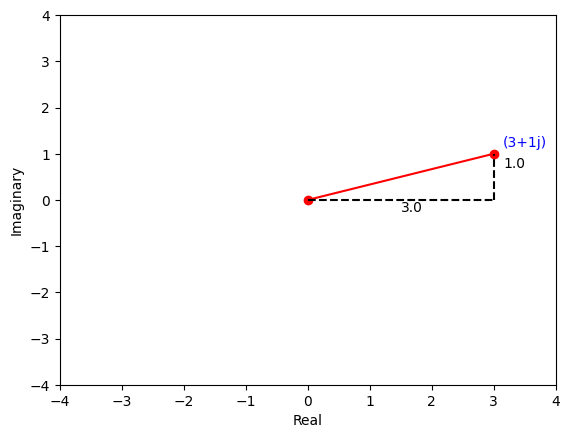

In [9]:
argand([z3])

You can see from the plot that the complex number $3+1j$ is represented by travelling $3$ along in $x$ and $1$ up in $y$. This form of complex number is sometimes known as "Cartesian form". One can alternatively express complex numbers in polar form, or "modulus and argument" form. For a complex number $z=A+iB$:


*   The modulus of a complex number is the size of the line linking the Cartesian position and the origin, and is calculated as $|z|=\sqrt{A^2+B^2}$.
*   The argument of a complex number is the angle subtended between the line linking the complex number and the origin, and the positive real axis. 

The argument, $\theta$, is calculated according to 

$$
\theta=\tan^{-1}{\left(\frac{|B|}{|A|}\right)},
$$ 

when located in the positive $x$ and positive $y$ part of the diagram. If either $B$ or $A$ is positive one must add/subtract in order to form the argument of the complex number relative to the positive real axis.

Most of the angle calculation methods baked into Python already take account of this, using the *atan2* function, or the *angle* command from numpy:










In [10]:
argz3 = np.arctan2(z3.imag, z3.real)
print(math.degrees(argz3))
print(np.angle(z3, deg=True))
print(np.angle(complex(-1,2), deg=True))

18.43494882292201
18.43494882292201
116.56505117707799


*atan2* is a fairly common function in several computer languages: you can find more information about it through e.g. Google and other search engines. The numpy command *angle* can handle complex datatypes as input, which can save use some effort compared to *atan2*:

In [11]:
print(np.angle(0+1j,deg=True))

90.0


## Cmath
Python has an explicit package solely for manipulating complex numbers, called *cmath*. It goes far beyond our needs (complex numbers are an entire interesting branch of mathematics with wide-ranging implications and applications). Some of the more basic functions can be useful however: *cmath* can quickly and directly convert to/from polar form, for example using the *polar* command:

In [12]:
#import cmath for complex number operations
import cmath

#find the polar coordinates of complex number
print(cmath.polar(2 + 3j))
print(cmath.polar(1 + 5j))

(3.605551275463989, 0.982793723247329)
(5.0990195135927845, 1.373400766945016)


## Rotations with Complex Numbers

We now have a relatively clear idea of some of the most useful properties of complex numbers. We will need these concepts to understand longer forms of complex numbers called "Quaternions", which are commonly used to rotate objects in 3D space.

As a sneak peak of what we might expect from quaternions, we can also use complex numbers to rotate objects in 2D. The content of this section is strictly for information, and will not be examined upon. In the lectures we illustrated this idea with an example:

### Lecture example: rotate a position using complex numbers
**Rotate the coordinates $(1,5)$ by $60^o$ counterclockwise about the origin using complex numbers.**


Our first step is to express the coordinate as a complex number:

In [13]:
zp = complex(1.,5.)

Next we must also express the rotation as a complex number. The modulus of the complex number must be one. 

In [14]:
theta = 60
zr = complex(np.cos(np.radians(theta)),np.sin(np.radians(theta)))

To carry out the rotation, we multiply both complex numbers together, with the rotation acting to the left of coordinate:

In [15]:
image = zr*zp
imstr="{:.2f}+{:.2f}j".format(image.real,image.imag)
print(imstr) 

-3.83+3.37j


In [16]:
hp = np.array([1, 5, 1])
R_theta = np.matrix([[np.cos(math.radians(theta)), np.sin(math.radians(theta)), 0], 
                     [-np.sin(math.radians(theta)), np.cos(math.radians(theta)), 0], 
                     [0, 0, 1]]) 
rp = hp.transpose()*R_theta
rmstr="({:.2f},{:.2f})".format(rp[0,0], rp[0,1])
print("achieved with matrix transforms: ", rmstr)
lstr="({:.2f},{:.2f})".format(0.5*(1.-5.*np.sqrt(3)), 0.5*(np.sqrt(3)+5.))
print("lectures stated im= ", lstr) 

achieved with matrix transforms:  (-3.83,3.37)
lectures stated im=  (-3.83,3.37)


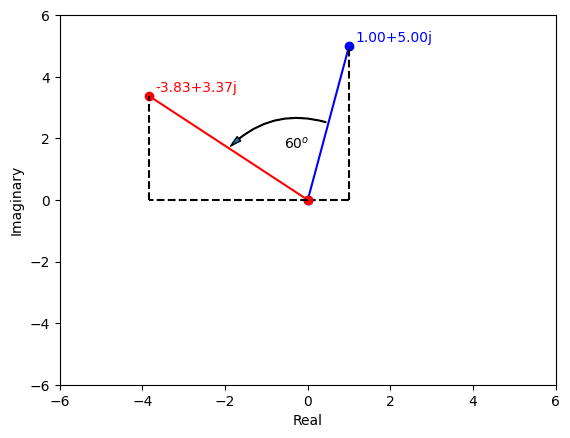

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([0,zp.real],[0,zp.imag],'bo-',label='python')
zpstr="{:.2f}+{:.2f}j".format(zp.real,zp.imag)
ax.text(zp.real+0.15, zp.imag+0.15, zpstr, c='blue')
ax.plot([zp.real,zp.real],[0,zp.imag],'k--',label='python')
ax.plot([0,zp.real],[0,0],'k--',label='python')
ax.plot([0,image.real],[0,image.imag],'ro-',label='python')
imstring="{:.2f}+{:.2f}j".format(image.real,image.imag)
ax.text(image.real+0.15, image.imag+0.15, imstr, c='red')
ax.plot([image.real,image.real],[0,image.imag],'k--',label='python')
ax.plot([0,image.real],[0,0],'k--',label='python')
limit=np.max(np.ceil(np.absolute(image))) # set limits for axis
style="Simple,tail_width=0.5,head_width=4,head_length=8"
kw = dict(arrowstyle=style)
a1 = FancyArrowPatch((0.5*zp.real, 0.5*zp.imag), (0.5*image.real, 0.5*image.imag),connectionstyle="arc3,rad=0.3", **kw)
ax.add_patch(a1)
ax.axis(xmin=-limit,xmax=limit, ymin=-limit,ymax=limit)
angstring="{}$^o$".format(theta)
ax.text(0.2*(zp.real+image.real), 0.2*(zp.imag+image.imag),angstring, c='black')
ax.set_ylabel('Imaginary')
ax.set_xlabel('Real')
plt.show()

Thus we have confirmed the process: converting a 2D position to a complex number and multiplying it by a complex number representing the rotation achieves the *same* image location as carrying out a 2D graphics transformation!

To achieve the same result in three dimensions, we have to use quaternions (as we will see shortly!).. 

## Over to you!
These examples are one way that we can use Python to illustrate some of our methods taught in lectures.

Can you confirm some of the tutorial question solutions using Python? Can you plot these on the Argand diagram, or evaluate them in polar form? Can you pick a different position and perform a rotation to satisfy yourself that complex numbers and graphics transformations can achieve identical results..?